In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam,RMSprop
from keras import backend as k

In [2]:
from keras.datasets import mnist
#dataset loading
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


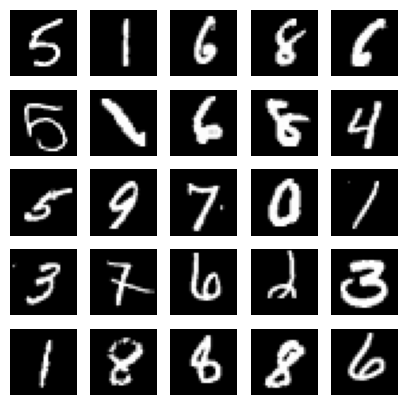

In [3]:
#sample 25 mnist digits from the train dataset
indexes = np.random.randint(0,x_train.shape[0],size=25)
images = x_train[indexes]
labels = y_train[indexes]
#plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]
  plt.imshow(image,cmap="gray")
  plt.axis("off")

plt.show()
plt.savefig("mnist-sample.png")
plt.close("all")


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical,plot_model

In [5]:
image_size = x_train.shape[1]
input_size = image_size*image_size
input_size

784

In [6]:
x_train = np.reshape(x_train,[-1,input_size])
x_train = x_train.astype('float32')/255
x_test = np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32')/255

In [7]:
batch_size = 128
hidden_units = 20
dropout = 0.45

In [8]:
num_labels = len(np.unique(y_train))

In [9]:
model=Sequential()
model.add(Dense(hidden_units,input_dim=input_size))
model.add(Activation('relu'))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 activation_1 (Activation)   (None, 20)                0         
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 activation_2 (Activation)   (None, 10)                0

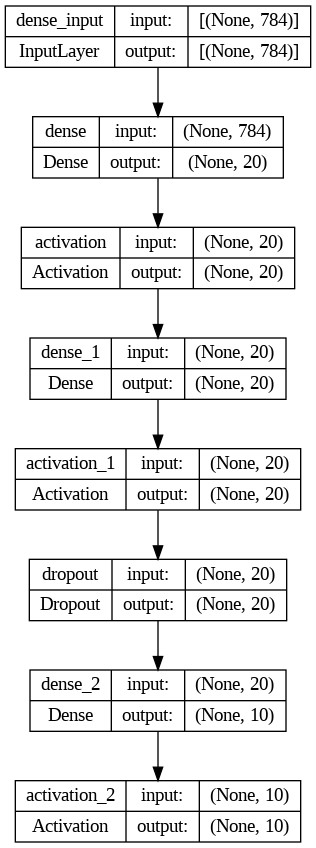

In [11]:
plot_model(model, to_file='mlp-mnist.png',show_shapes=True)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
h1=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 9s 10ms/step - loss: 1.0642 - accuracy: 0.6397 - val_loss: 0.3676 - val_accuracy: 0.9066
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6374 - accuracy: 0.7924 - val_loss: 0.2803 - val_accuracy: 0.9215
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5503 - accuracy: 0.8234 - val_loss: 0.2417 - val_accuracy: 0.9336
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4731 - accuracy: 0.8512 - val_loss: 0.2211 - val_accuracy: 0.9387
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4366 - accuracy: 0.8652 - val_loss: 0.2044 - val_accuracy: 0.9399
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4127 - accuracy: 0.8714 - val_loss: 0.1967 - val_accuracy: 0.9425
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3894 - accuracy: 0.8792 - val_loss: 0.1929 - val_accuracy: 0.9433
Epo

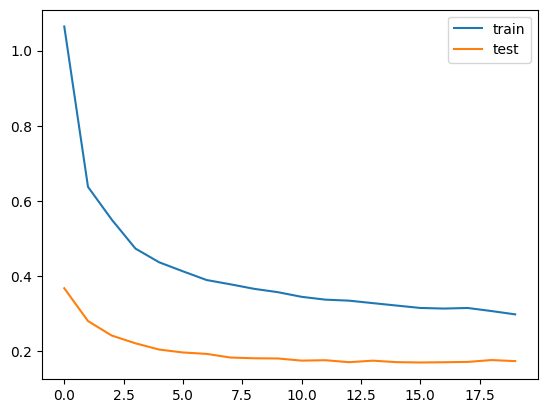

In [14]:
plt.plot(h1.history['loss'],label='train')
plt.plot(h1.history['val_loss'],label='test')
plt.legend()
plt.show()

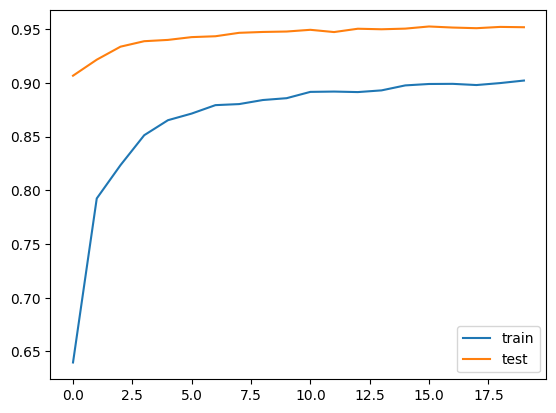

In [15]:
plt.plot(h1.history['accuracy'],label='train')
plt.plot(h1.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [16]:
#without dropout
model1=Sequential()
model1.add(Dense(hidden_units,input_dim=input_size))
model1.add(Activation('relu'))

model1.add(Dense(hidden_units))
model1.add(Activation('relu'))

model1.add(Dense(num_labels))
model1.add(Activation('softmax'))

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 activation_3 (Activation)   (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trai

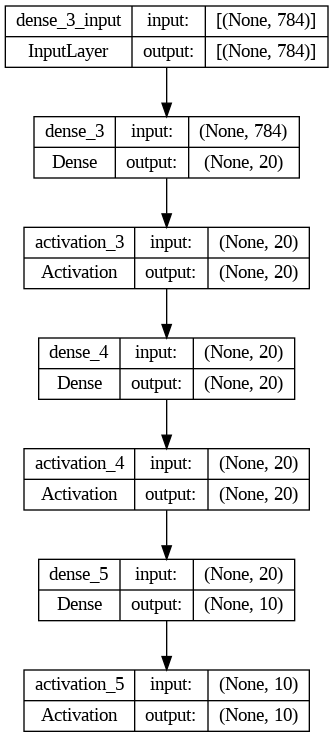

In [18]:
plot_model(model1, to_file='mlp-mnist.png',show_shapes=True)

In [19]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
h2=model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.6380 - accuracy: 0.8191 - val_loss: 0.2882 - val_accuracy: 0.9182
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2741 - accuracy: 0.9221 - val_loss: 0.2357 - val_accuracy: 0.9328
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2316 - accuracy: 0.9338 - val_loss: 0.2148 - val_accuracy: 0.9368
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2073 - accuracy: 0.9404 - val_loss: 0.2026 - val_accuracy: 0.9407
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1911 - accuracy: 0.9456 - val_loss: 0.1859 - val_accuracy: 0.9439
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1762 - accuracy: 0.9482 - val_loss: 0.1787 - val_accuracy: 0.9476
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1646 - accuracy: 0.9518 - val_loss: 0.1710 - val_accuracy: 0.9487
Epoch 

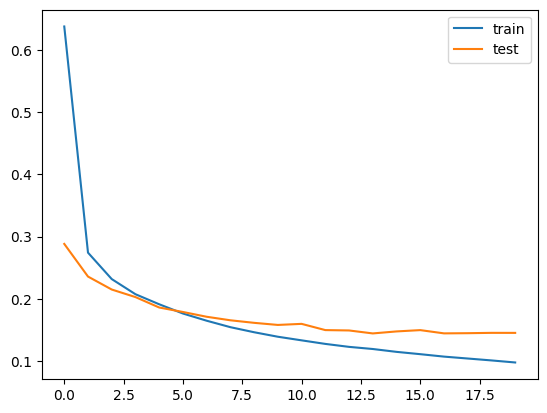

In [21]:
plt.plot(h2.history['loss'],label='train')
plt.plot(h2.history['val_loss'],label='test')
plt.legend()
plt.show()

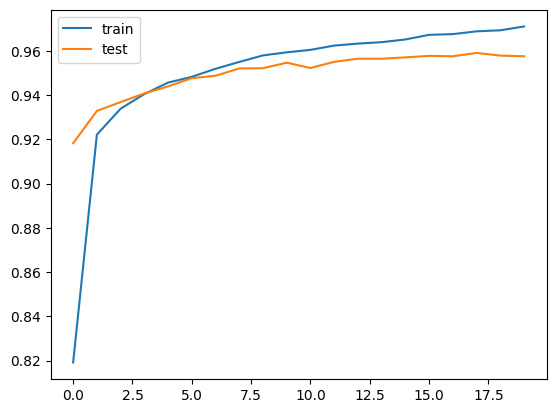

In [22]:
plt.plot(h2.history['accuracy'],label='train')
plt.plot(h2.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [23]:
from tensorflow import keras

In [24]:
#regularisation
model2=Sequential()
model2.add(Dense(hidden_units,input_dim=input_size))
model2.add(Activation('relu'))

model2.add(Dense(hidden_units,kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(Activation('relu'))

model2.add(Dense(num_labels))
model2.add(Activation('softmax'))

In [25]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
h3=model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.6334 - accuracy: 0.8254 - val_loss: 0.3227 - val_accuracy: 0.9145
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2975 - accuracy: 0.9226 - val_loss: 0.2572 - val_accuracy: 0.9336
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2541 - accuracy: 0.9353 - val_loss: 0.2350 - val_accuracy: 0.9399
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2289 - accuracy: 0.9419 - val_loss: 0.2215 - val_accuracy: 0.9431
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2126 - accuracy: 0.9454 - val_loss: 0.2070 - val_accuracy: 0.9456
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1992 - accuracy: 0.9499 - val_loss: 0.1962 - val_accuracy: 0.9499
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1867 - accuracy: 0.9528 - val_loss: 0.1941 - val_accuracy: 0.9506
Epoch 

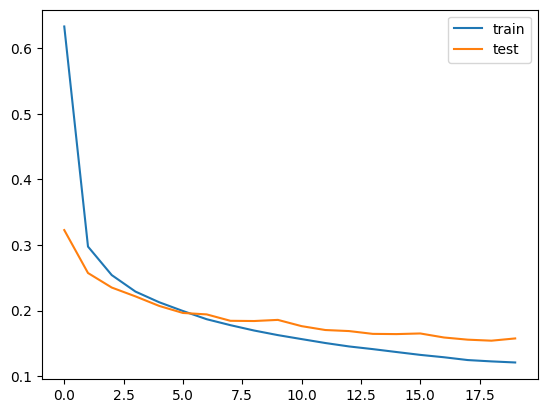

In [27]:
plt.plot(h3.history['loss'],label='train')
plt.plot(h3.history['val_loss'],label='test')
plt.legend()
plt.show()

In [28]:
#early stopping
from keras.callbacks import EarlyStopping

In [29]:
model3=Sequential()
model3.add(Dense(hidden_units,input_dim=input_size))
model3.add(Activation('relu'))

model3.add(Dense(hidden_units))
model3.add(Activation('relu'))
model3.add(Dropout(dropout))

model3.add(Dense(num_labels))
model3.add(Activation('softmax'))

In [30]:
model3.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [31]:
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1)

In [32]:
history=model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=4000,verbose=0,callbacks=[es])

Epoch 4: early stopping


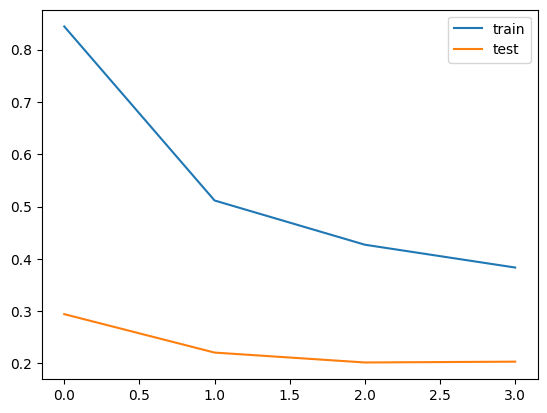

In [33]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [34]:
#own model
batch_size = 128
hidden_units = 200
dropout = 0.50

In [35]:
num_labels = len(np.unique(y_train))

In [36]:
model4=Sequential()
model4.add(Dense(hidden_units,input_dim=input_size))
model4.add(Activation('relu'))
model4.add(Dropout(dropout))

model4.add(Dense(hidden_units))
model4.add(Activation('relu'))
model4.add(Dropout(dropout))

model4.add(Dense(num_labels))
model4.add(Activation('softmax'))

In [37]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               157000    
                                                                 
 activation_12 (Activation)  (None, 200)               0         
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 200)               40200     
                                                                 
 activation_13 (Activation)  (None, 200)               0         
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

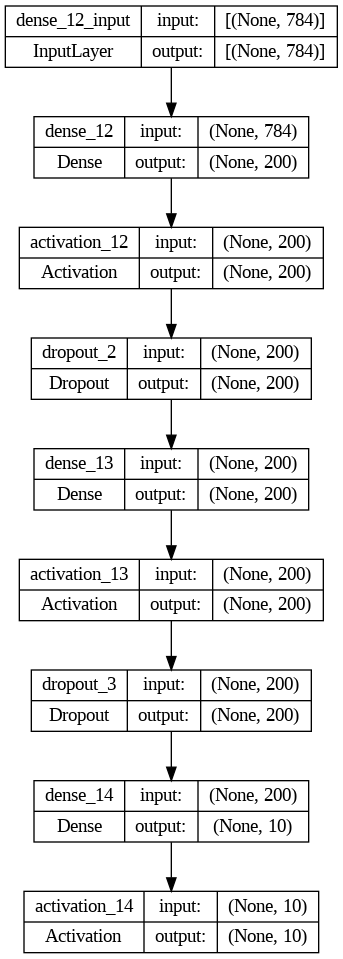

In [38]:
plot_model(model4, to_file='mlp-mnist.png',show_shapes=True)

In [39]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
h5=model4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=128)

Epoch 1/50
469/469 [==============================] - 7s 13ms/step - loss: 0.5063 - accuracy: 0.8428 - val_loss: 0.1669 - val_accuracy: 0.9486
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2400 - accuracy: 0.9296 - val_loss: 0.1273 - val_accuracy: 0.9607
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1970 - accuracy: 0.9420 - val_loss: 0.1013 - val_accuracy: 0.9683
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1669 - accuracy: 0.9515 - val_loss: 0.0981 - val_accuracy: 0.9711
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1479 - accuracy: 0.9550 - val_loss: 0.0905 - val_accuracy: 0.9712
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1386 - accuracy: 0.9581 - val_loss: 0.0892 - val_accuracy: 0.9739
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1258 - accuracy: 0.9624 - val_loss: 0.0821 - val_accuracy: 0.9751

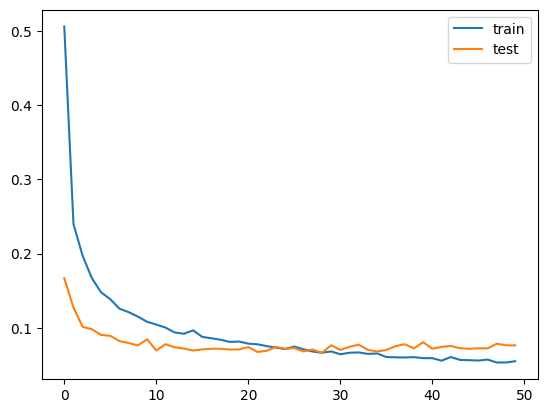

In [41]:
plt.plot(h5.history['loss'],label='train')
plt.plot(h5.history['val_loss'],label='test')
plt.legend()
plt.show()